<img src="pokecluster.jpg",width=700,hight=700>

# Imports

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.figsize'] = (12, 6)
pokedados=pd.read_csv("Pokemon.csv")
pd.options.mode.chained_assignment = None

# Objetivos

O objetivos desse projeto são determinar, através de uma clusterização de todos os pokémons disponíveis, a Geração que possue o maior número de pokémons com alto potencial de batalha. Além de comparar os clusters resultantes com as diferentes ligas competitivas dos jogos de pokémon, afim de checar sua precisão e possivelmente auxiliar tais ligas em futuras mudanças.

# Construindo o Cluster 
Para exemplificar o que é um Cluster, construiremos um básico, baseado em apenas 2 variáveis, os status de Attack e Defense dos pokémons.


Existem vários métodos de clusterização. O método utilizado nesse projeto é o K-Means, que consiste em criar um plano para cada variável, fazendo com que cada objeto seja um ponto no espaço, ou seja, se um pokémon tem 100 de Attack e 55 de Defense, o pokémon terá coordenadas (x=100, y=55).

Após designar cada pokémon ao plano, serão colocados no gráfico 4 pontos (pois nós só queremos 4 clusters nesse caso) que chamaremos de centróides, com coordenadas x e y aleatórias. Em seguida, será calculada a distância-euclidiana de cada ponto até essas quatro centróides e o objeto será designado à centróide mais próxima. A média das coordenadas dos pontos designados à cada centróide, servirão para dar origem às 4 novas coordenadas das centróides, que estarão mais próximas dos pontos com características comuns.

Esse processo será feito varias vezes até que as centróides parem de mudar de lugar, assim os pontos mais próximos da centróide 1 estarão dentro do cluster 1, e os pontos mais próximos da centróide 2 estarão dentro do cluster 2, e assim em diante.

87.247706422 126.449541284
47.652173913 46.4624505929
79.4577922078 72.2922077922
132.015384615 86.6923076923


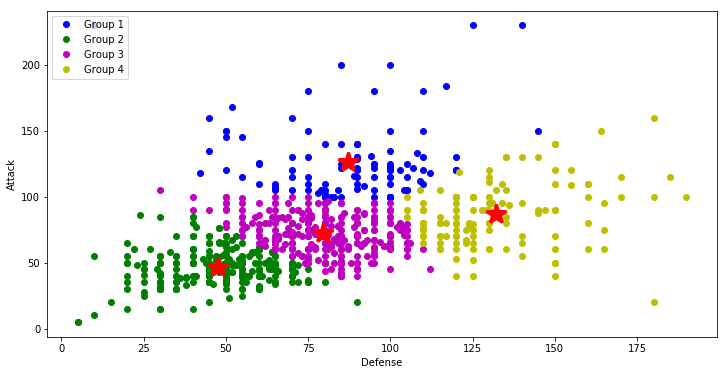

In [4]:
def ClusterKmeansEx(dataframe):                                  #Função que gera o dataframe resultante.
    f1 = dataframe['Attack'].values
    f2 = dataframe['Defense'].values
    X=np.array(list(zip(f1,f2))).reshape(len(f1),2)
    kmeans = KMeans(n_clusters=4).fit(X)
    x= kmeans.fit_predict(X)
    for i,j in enumerate(dataframe.index):
        dataframe.loc[j,"Group"]=""
        if x[i] == 0:
            dataframe.loc[j,"Group"]="Group 1"
        if x[i] == 1:
            dataframe.loc[j,"Group"]="Group 2"
        if x[i] == 2:
            dataframe.loc[j,"Group"]="Group 3"
        if x[i] == 3:
            dataframe.loc[j,"Group"]="Group 4"
        
            
        
    return dataframe,X,kmeans,x

            
f1 = pokedados['Attack'].values
f2 = pokedados['Defense'].values
Resultado=ClusterKmeansEx(pokedados)
X=Resultado[1]
kmeans = Resultado[2]
x=Resultado[3]

#Gráficos dos pontos de cada pokémons e sua colorização diferente dependendo do seu cluster.

plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'bo')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'r*',markersize=20,mew=3)
# print centroid 1
print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))

h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'go')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'r*',markersize=20,mew=3)
# print centroid 2
print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))

h3,=plt.plot(f1[kmeans.labels_==2],f2[kmeans.labels_==2],'mo')
plt.plot(np.mean(f1[kmeans.labels_==2]),np.mean(f2[kmeans.labels_==2]),'r*',markersize=20,mew=3)
# print centroid 3
print(np.mean(f1[kmeans.labels_==2]),np.mean(f2[kmeans.labels_==2]))

h4,=plt.plot(f1[kmeans.labels_==3],f2[kmeans.labels_==3],'yo')
plt.plot(np.mean(f1[kmeans.labels_==3]),np.mean(f2[kmeans.labels_==3]),'r*',markersize=20,mew=3)
# print centroid 4
print(np.mean(f1[kmeans.labels_==3]),np.mean(f2[kmeans.labels_==3]))

plt.ylabel('Attack')
plt.xlabel('Defense')

plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
plt.show()

In [5]:
Resultado[0] #Gera o dataframe com a coluna que aponta o cluster de cada pokémon.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Group 2
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Group 3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Group 3
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Group 1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Group 2
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Group 2
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Group 3
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,Group 4
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,Group 3
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Group 2


# Resultados
   Após de executado, podemos perceber que o código separou os pokémons em 4 grupos, os com Attack e Defense baixos (cluster azul - Grupo 1), os com atributos intermediários (cluster verde - Grupo 2), os com ambos os stats altos (cluster roxo - Grupo 3) e os com Attack alto e Defense baixo (cluster amarelo - Grupo 4).
<img src="ex1.jpg",width=700,hight=700>

# Observações
   É possível perceber ao analisar os dados que utilizar apenas 2 variáveis, no caso Attack e Defense, não é a melhor opção para um cluster de pokémons, visto que pokémons que tem nível de poder muito diferente acabam aparecendo no mesmo grupo. Isso ocorre devido a eles terem mais 4 atributos principais não contabilizados nesse exemplo. Assim, aplicaremos o K-Means à todos os stats criando clusters mais confiáveis. No entanto teremos uma clusterização em 6 dimensões nesse caso, o que nos impede de fazer representações gráficas, mas o exemplo acima já demonstra o tipo de gráfico criado por esse método.
<img src="fail.jpg",width=700,hight=700>

# Funções para a Clusterização

Aqui estão as funções necessárias para fazer uma clusterização desse porte, além de outras que nos permitem analisar o resultado da aplicação desse método.

In [6]:
def SetDataFrameType(dataframeN,type1,type2):                   #Retorna um DataFrame com os tipos desejados
    index=[]
    dataframe=dataframeN.fillna("None")
    for i in range(len(dataframe)):
        if type2=="All":
            if dataframe["Type 1"][i]==type1 or dataframe["Type 2"][i]==type1:
                index.append(i)
        if type2=="None":
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]=="None":
                index.append(i)      
        else:
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]==type2 or dataframe["Type 1"][i]==type2 and dataframe["Type 2"][i]==type1:
                index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    return DF

def SetDataFrameLegendary(dataframe):                           #Retorna um DataFrame somente com os Pokemons lendarios
    index=[]
    for i in dataframe.index:
        if dataframe["Legendary"][i]==True:
            index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    
    return DF

def Generation(dataframe,gen):                                  #Retorna um DataFrame com os pokemons da geracao escolhida
    DF=dataframe.loc[(dataframe.Generation == gen)]
    
    return DF
    
def ClusterKmeans(dataframe):                                   #Retorna um DataFrame com os Pokemos classificaodos em 4 grupos
    f1 = dataframe['HP'].values
    f2 = dataframe['Attack'].values
    f3 = dataframe['Sp. Atk'].values
    f4 = dataframe['Defense'].values
    f5 = dataframe['Sp. Def'].values
    f6 = dataframe['Speed'].values
    X=np.array(list(zip(f1,f2,f3,f4,f5,f6))).reshape(len(f1),6)
    kmeans = KMeans(n_clusters=4).fit(X)
    x= kmeans.fit_predict(X)
    for i,j in enumerate(dataframe.index):
        dataframe.loc[j,"Group"]=""
        if x[i] == 0:
            dataframe.loc[j,"Group"]="Group 1"
        if x[i] == 1:
            dataframe.loc[j,"Group"]="Group 2"
        if x[i] == 2:
            dataframe.loc[j,"Group"]="Group 3"
        if x[i] == 3:
            dataframe.loc[j,"Group"]="Group 4"
    
    return dataframe,X    

# Método do Cotovelo

O método do cotovelo é um instrumento utilizado na clusterização, no qual é determinado o número adequado de clusters para um dataset. Nele são gerados K-Means diferentes com o número de clusters variando, que são exibidos em um gráfico da distorção desses K-Means pelo número de clusters ascendente.

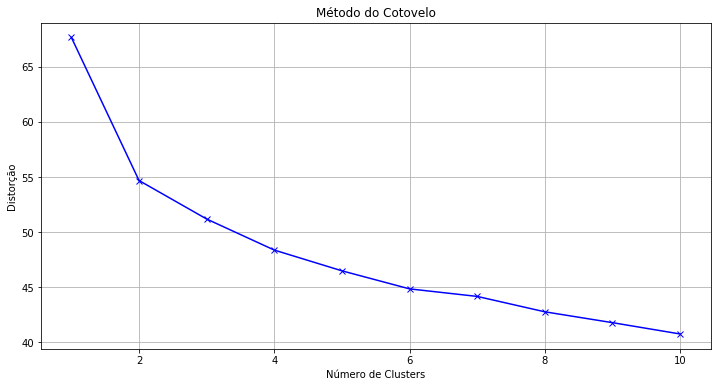

In [7]:
distortions = []
K = range(1,11)
X=(ClusterKmeans(pokedados)[1])
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.grid(True)
plt.title('Método do Cotovelo')
plt.show()

O "Cotovelo" é o número de clusters no qual a variação de distorção adiante é pequena demais para ser melhor aumentar o número de centroides. Nesse caso o cotovelo pode ser interpretado entre 2-4 clusters, escolhemos 4 devido ao grande número de pokémons e a complexidade, afinal são 6 dimensões, da clusterização.

# Clusterização Total

Aqui aplicamos a função de clusterização previamente feita, utilizando o número ideal de clusters obtido pelo método do cotovelo e geramos o dataframe de todos os pokémons com seus respectivos clusters.

In [12]:
pokecluster=ClusterKmeans(pokedados)
pokecluster[0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Group 1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Group 3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Group 3
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Group 4
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Group 1
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Group 3
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Group 4
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,Group 4
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,Group 4
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Group 1


# Análise de Gerações

Neste momento analisamos cada geração dos pokémons para responder a pergunta original e definir a geração com a maior porcentagem de pokémons de alto poder de combate.

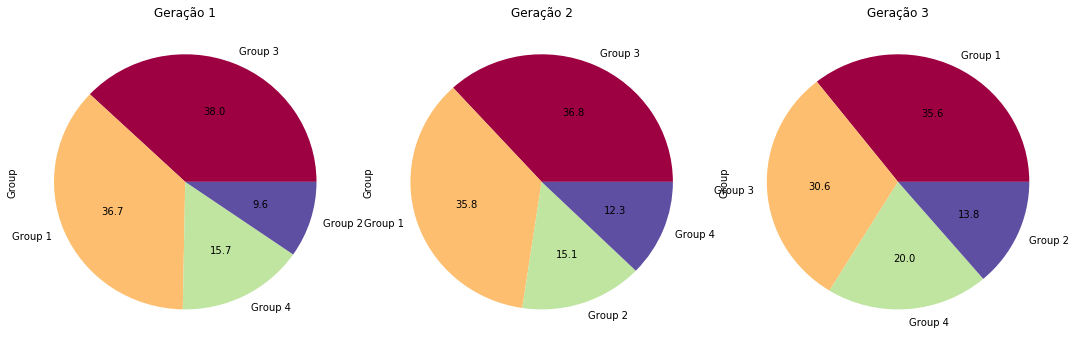

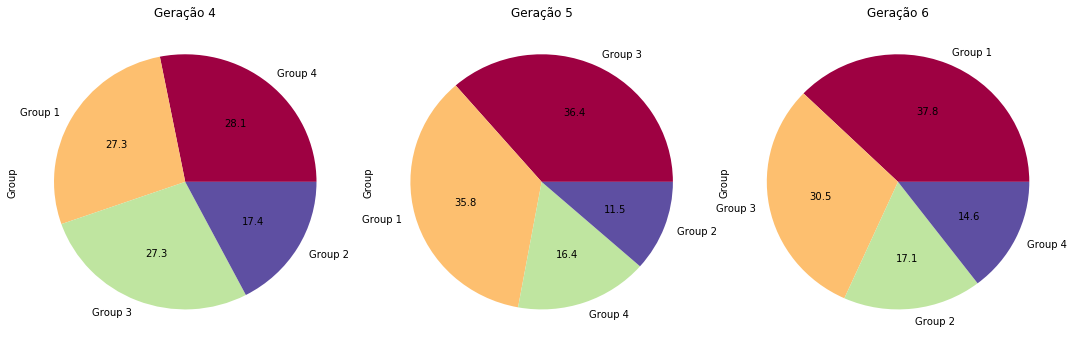

In [13]:
g1 = pokecluster[0].loc[pokecluster[0].Generation == 1]
v1 = g1.Group.value_counts()

g2 = pokecluster[0].loc[pokecluster[0].Generation == 2]
v2 = g2.Group.value_counts()

g3 = pokecluster[0].loc[pokecluster[0].Generation == 3]
v3 = g3.Group.value_counts()

g4 = pokecluster[0].loc[pokecluster[0].Generation == 4]
v4 = g4.Group.value_counts()

g5 = pokecluster[0].loc[pokecluster[0].Generation == 5]
v5 = g5.Group.value_counts()

g6 = pokecluster[0].loc[pokecluster[0].Generation == 6]
v6 = g6.Group.value_counts()

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = v1.plot(kind='pie',title='Geração 1',autopct='%.1f',colormap="Spectral")

plt.subplot(132)
plot = v2.plot(kind='pie',title='Geração 2',autopct='%.1f',colormap="Spectral")

plt.subplot(133)
plot = v3.plot(kind='pie',title='Geração 3',autopct='%.1f',colormap="Spectral")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = v4.plot(kind='pie',title='Geração 4',autopct='%.1f',colormap="Spectral")

plt.subplot(132)
plot = v5.plot(kind='pie',title='Geração 5',autopct='%.1f',colormap="Spectral")

plt.subplot(133)
plot = v6.plot(kind='pie',title='Geração 6',autopct='%.1f',colormap="Spectral")

plt.tight_layout()
plt.show()

Ao analisar os resultados fica evidente que a <strong>Geração 4 </strong> é a geração com maior potencial, uma vez que o Grupo 4, que inclui a maioria dos pokémons lendários e de evoluções de alto nível, representa <strong>28.1%</strong> de seu total uma quantidade significativa a mais que as outras gerações, além de possuir 27.3% de seus pokémons no Grupo 3 que também inclui pokémons fortes.